# Recommender system for a medical supplies company

The goal of the project is to help the company generate incremental sales by
implementing a recommender system.
+ Data Prep and Modelling
+ Missing data
+ Calculate find the most popular product using maximum sales by volume and dollar amount
+ Company with a maximum purchase
+ Build a popularity-based recommender system
+ Build a recommender system using matrix factorization
+ Cosine similarity for product description

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df = pd.read_csv('PBL 5 recommendation data.csv', encoding='latin-1')    

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,b,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Button

In [4]:
df.shape

(4194, 181)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(9), object(74)
memory usage: 5.8+ MB


In [6]:
df.describe()

,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,0.0,...,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,NaN,...,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,1.021334e+07,0.391842,5276.541078,1065.679090,3818.085460,1.342831e+09,NaN,231.156869,4.859280,4.531500,11.850291,14.617203,NaN,NaN,32.755244,51.296654,222.898475,209.843126,NaN,NaN,6.928203,0.312482,1.809258e+07,213.804804,NaN,N

In [7]:
df.isnull().sum()   

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

#### Creating 4 separate dataframes from the main DataFrame by 'Customers' , 'Orders', 'Order Items' and'Products'

In [8]:
customers_df = df.filter(regex='^Customers\.')
orders_df = df.filter(regex='^Orders\.')
products_df = df.filter(regex='^Products\.')
order_items_df = df.filter(regex='^Order_Items\.')   

customers_df.columns = customers_df.columns.str.replace('Customers\.', '', regex=True)
orders_df.columns = orders_df.columns.str.replace('Orders\.', '', regex=True)
products_df.columns = products_df.columns.str.replace('Products\.', '', regex=True)
order_items_df.columns = order_items_df.columns.str.replace('Order_Items\.', '', regex=True)

In [9]:
customers_df.head()

,id,fname,lname,company,create_date,status,mailing,reminders,tax_exempt,account_id,sales_rep,rewards,profile_id,last_modified,customer_type
0,b,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0.0


In [10]:
customers_df = customers_df[['id', 'fname', 'lname', 'company']]

In [11]:
customers_df.head()

,id,fname,lname,company
0,b,Christy,Dill,Company0
1,3,John,Smith,Company1
2,3,John,Smith,Company1
3,4,James,Anderson,NaN
4,5,Abraham,Pollak,Company3


In [12]:
orders_df.head()

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\r\npaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [13]:
orders_df = orders_df[['id', 'customer_id', 'currency', 'subtotal']]

In [14]:
orders_df.head()

,id,customer_id,currency,subtotal
0,3758,797,USD,57.20
1,23,3,USD,20.00
2,9531,3,USD,68.78
3,29,4,USD,19.56
4,30,5,USD,36.05


In [15]:
order_items_df.head()

,id,parent,product_id,product_name,attributes,attribute_names,attribute_prices,qty,price,cost,registry_item,related_id,reorder_frequency,account_id,flags
0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [16]:
order_items_df = order_items_df[['id', 'parent', 'product_id', 'qty','price','product_name']]    

In [17]:
order_items_df.head()

,id,parent,product_id,qty,price,product_name
0,5284,3758,2310.0,1,57.20,"Basic Rollators, Green"
1,31,23,177.0,4,5.00,"Urinary Drain Bags,0.000"
2,11655,9531,1.0,1,68.78,"SensiCare Nitrile Exam Gloves, Blue, XX-Large"
3,1816,29,983.0,1,19.56,Basket for 2-Button Walkers
4,40,30,991.0,1,36.05,Tens Units


In [18]:
products_df.head()

,id,status,product_type,template,vendor,import_id,name,display_name,menu_name,list_price,price,sale_price,cost,flags,left_flag,right_flag,last_modified,taxable,shopping_gtin,shopping_brand,shopping_mpn,shopping_gender,shopping_color,shopping_age,shopping_flags,amazon_asin,amazon_type,amazon_item_type,amazon_price,google_shopping_id,google_shopping_type,google_shopping_cat,google_adwords,shopping_cat,shopping_type,pricegrabber_cat,shopzilla_cat,thefind_cat,quickbooks_id,qb_edit_sequence,price_break_type,price_breaks,short_description,long_description,websites,video,audio,seo_title,seo_description,seo_keywords,seo_header,seo_footer,seo_url,seo_category,unit,packaging,display_packaging,multiple,length,width,height,rx,latex,upc,msds_link,msds_label,lit_link,lit_label,hcpcs,case_qty,markup,override_markup,notes,import_flags,map_price,features_title,warranty,hygienic,default_quantity,user_size,assembly,installation,shipping_length,shipping_width,shipping_height,shipping_weight,handling_time,rotation_link,google_shopping_label,product_option,size,material,arm_style,leg_style,seat_size,family_id,saved_status,freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.70,57.64,NaN,44.00,0.0,NaN,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,NaN,Green,NaN,62.0,B00I6GQE0A,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,NaN,NaN,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,NaN,NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,177.0,1.0,NaN,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,NaN,14.41,10.29,5.0,1.87,65.0,NaN,NaN,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,NaN,NaN,NaN,62.0,B000QF7Y76,NaN,health-care-products,NaN,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,NaN,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,NaN,NaN,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,NaN,NaN,NaN,Urinary Drain Bags | MEDLINE - DYNC1674H,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,1.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,96.29,68.78,NaN,52.50,32896.0,NaN,NaN,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,NaN,Blue,NaN,62.0,B002209AOI,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,NaN,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,1.450321e+09,NaN,NaN,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,NaN,NaN,NaN,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Ni

In [19]:
products_df = products_df[['id','name','sale_price', 'shopping_brand']]

In [20]:
customers_df.head()

,id,fname,lname,company
0,b,Christy,Dill,Company0
1,3,John,Smith,Company1
2,3,John,Smith,Company1
3,4,James,Anderson,NaN
4,5,Abraham,Pollak,Company3


In [21]:
customers_df.shape

(4194, 4)

In [22]:
customers_df.drop_duplicates(inplace=True)
customers_df.shape

(3054, 4)

In [23]:
orders_df.head()

,id,customer_id,currency,subtotal
0,3758,797,USD,57.20
1,23,3,USD,20.00
2,9531,3,USD,68.78
3,29,4,USD,19.56
4,30,5,USD,36.05


In [24]:
orders_df.shape

(4194, 4)

In [25]:
order_items_df.head()

,id,parent,product_id,qty,price,product_name
0,5284,3758,2310.0,1,57.20,"Basic Rollators, Green"
1,31,23,177.0,4,5.00,"Urinary Drain Bags,0.000"
2,11655,9531,1.0,1,68.78,"SensiCare Nitrile Exam Gloves, Blue, XX-Large"
3,1816,29,983.0,1,19.56,Basket for 2-Button Walkers
4,40,30,991.0,1,36.05,Tens Units


In [26]:
order_items_df.shape

(4194, 6)

In [27]:
products_df.head()

,id,name,sale_price,shopping_brand
0,2310.0,"Basic Steel Rollators,Green",NaN,MEDLINE
1,177.0,Urinary Drain Bags,5.0,MEDLINE
2,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",NaN,MEDLINE
3,983.0,Basket for 2-Button Walkers,NaN,MEDLINE
4,991.0,TENS 3000 Analog Unit,NaN,ROSCOE MEDICAL INC


In [28]:
products_df.shape

(4194, 4)

In [29]:
products_df.drop_duplicates(inplace=True)
products_df.shape

(1711, 4)

## Sales DataFrame

In [30]:
sales_df = df[['Orders.id', 'Customers.id', 'Customers.company', 'Orders.currency', 'Orders.subtotal', 'Order_Items.product_id', 'Order_Items.qty', 'Order_Items.price','Products.name', 'Products.shopping_brand']]

In [31]:
sales_df.head()

,Orders.id,Customers.id,Customers.company,Orders.currency,Orders.subtotal,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.name,Products.shopping_brand
0,3758,b,Company0,USD,57.20,2310.0,1,57.20,"Basic Steel Rollators,Green",MEDLINE
1,23,3,Company1,USD,20.00,177.0,4,5.00,Urinary Drain Bags,MEDLINE
2,9531,3,Company1,USD,68.78,1.0,1,68.78,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",MEDLINE
3,29,4,NaN,USD,19.56,983.0,1,19.56,Basket for 2-Button Walkers,MEDLINE
4,30,5,Company3,USD,36.05,991.0,1,36.05,TENS 3000 Analog Unit,ROSCOE MEDICAL INC


In [32]:
sales_df.isnull().sum()

Orders.id                     0
Customers.id                  0
Customers.company          3467
Orders.currency               0
Orders.subtotal               0
Order_Items.product_id       43
Order_Items.qty               0
Order_Items.price             0
Products.name               157
Products.shopping_brand     162
dtype: int64

In [33]:
sales_df = sales_df[sales_df['Order_Items.product_id'].notnull()]

In [34]:
sales_df.isnull().sum()    

Orders.id                     0
Customers.id                  0
Customers.company          3432
Orders.currency               0
Orders.subtotal               0
Order_Items.product_id        0
Order_Items.qty               0
Order_Items.price             0
Products.name               114
Products.shopping_brand     119
dtype: int64

## Popularity Based Recommendation System

In [35]:
popularity_df = sales_df.groupby('Order_Items.product_id').agg({
    'Order_Items.qty': 'sum',
    'Orders.subtotal': 'sum',
    'Products.name' : 'first',
}).reset_index()

In [36]:
popularity_df

,Order_Items.product_id,Order_Items.qty,Orders.subtotal,Products.name
0,1.0,1,68.78,"SensiCare Nitrile Exam Gloves,Blue,XX-Large"
1,11.0,1,145.41,None
2,14.0,1,44.33,None
3,15.0,4,177.32,None
4,19.0,6,273.24,Disposable Forehead Thermometer
...,...,...,...,...
1748,25612.0,2,376.23,"Dynarex 3672, Triangular Bandage 36x36x51 - 12/Bx"
1749,25694.0,1,22.48,"Dynarex 4234, Stool Container - Polystyrene ..."
1750,25908.0,1,52.40,"Dynarex 1363, Green Soap - 1Gal, 4/cs"
1751,25920.0,2,151.14,"Dynarex 4250, Razors, Twin Blade - 6/50/Cs"


In [37]:
popularity_sum = popularity_df['Order_Items.qty'].sum()

In [38]:
popularity_df['percentage_qty'] = popularity_df['Order_Items.qty'] / popularity_sum * 100

In [39]:
popularity_df['rank'] = popularity_df['percentage_qty'].rank(ascending=False)

In [40]:
popularity_df.sort_values('rank', ascending=True, inplace=True)

In [41]:
popularity_df.head()

,Order_Items.product_id,Order_Items.qty,Orders.subtotal,Products.name,percentage_qty,rank
623,1846.0,396,13781.12,"Disposable Emergency Blanket,Not Applicable",5.508416,1.0
686,2107.0,228,12660.68,"MoliCare Disposable Super Plus Briefs,27""-47""",3.171512,2.0
589,1672.0,220,5559.40,"2-Ply Tissue/Poly Professional Towels,Not Appl...",3.060231,3.0
580,1648.0,133,5628.56,Sanitary Pads with Adhesive & Wings,1.850049,4.0
622,1842.0,112,2040.43,"Emesis Bags,Blue,36.000 OZ",1.557936,5.0


### Companies With the Maximum Purchases

In [42]:
company_purchases = sales_df.groupby('Customers.company').agg({
    'Orders.id': 'count', 
    'Orders.subtotal': 'sum' 
}).reset_index()
company_purchases.sort_values(by='Orders.id', ascending=False, inplace=True)

In [43]:
company_purchases.rename(columns={'Orders.id':'Order_sum'}, inplace=True)
company_purchases.rename(columns={'Orders.subtotal':'Total_sum'}, inplace=True)

In [44]:
company_purchases.head()

,Customers.company,Order_sum,Total_sum
52,Company145,27,8291.48
36,Company130,17,7312.98
380,Company59,15,13186.41
81,Company171,12,3178.16
67,Company159,11,8452.78


### Visualizations

In [45]:
popularity_top_5 = popularity_df.head(5)

In [46]:
popularity_by_total = popularity_df.sort_values('Orders.subtotal', ascending=False).head(5)

In [47]:
company_purchases_top_5 = company_purchases.head(5)

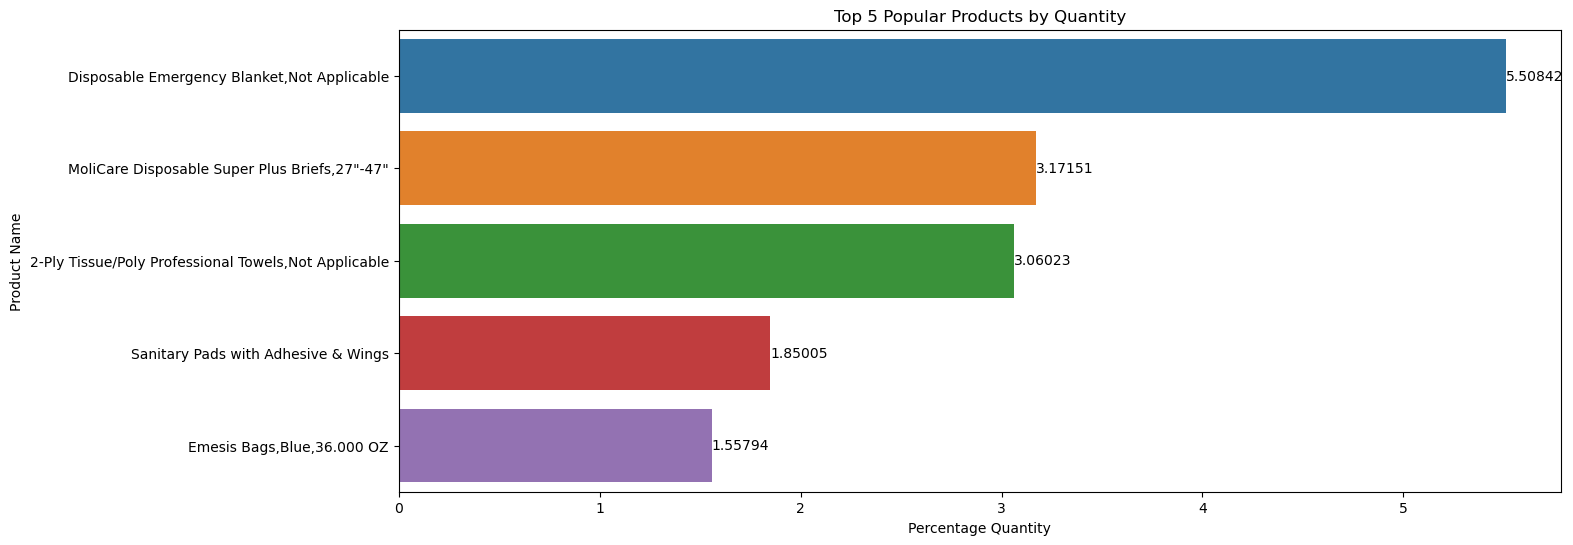

In [48]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='percentage_qty', y='Products.name', data=popularity_top_5)
plt.title('Top 5 Popular Products by Quantity')
plt.xlabel('Percentage Quantity')
plt.ylabel('Product Name')
ax.bar_label(ax.containers[0]);

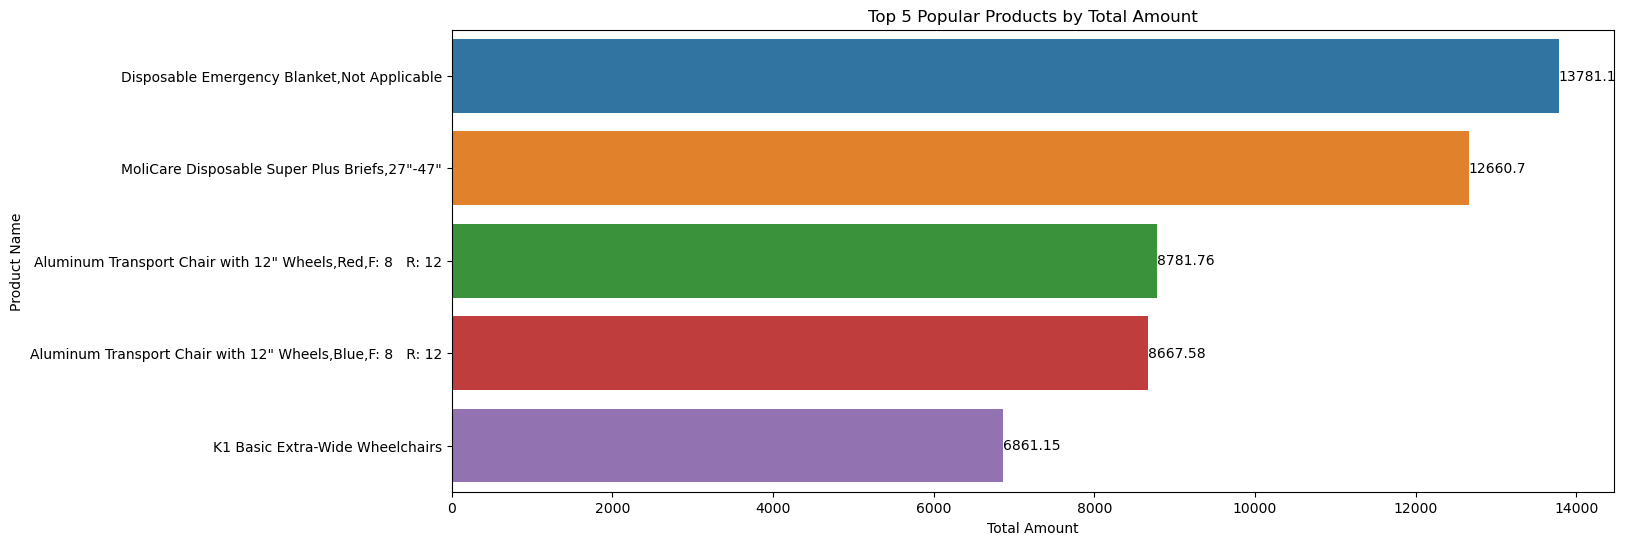

In [49]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Orders.subtotal', y='Products.name', data=popularity_by_total)
plt.title('Top 5 Popular Products by Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Product Name')
ax.bar_label(ax.containers[0]);

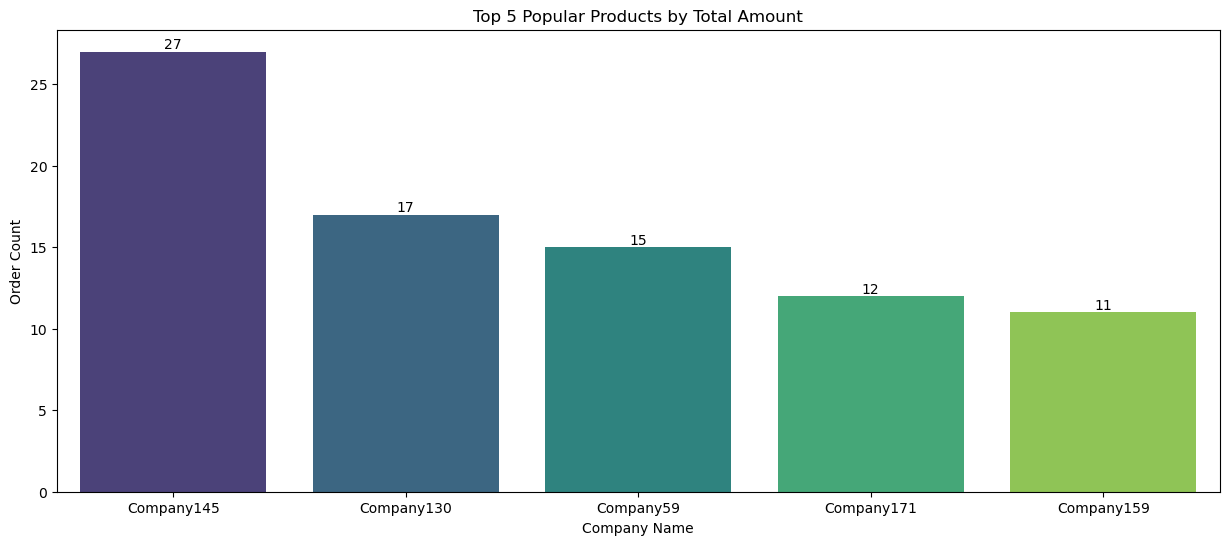

In [50]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Customers.company', y='Order_sum', data=company_purchases_top_5, palette='viridis')
plt.title('Top 5 Popular Products by Total Amount')
plt.xlabel('Company Name')
plt.ylabel('Order Count')
ax.bar_label(ax.containers[0]);

#### with plotly libray (does not appear on github)

In [51]:
fig = px.bar(popularity_top_5, 
             x='Products.name', 
             y='Order_Items.qty',
             hover_data=['Orders.subtotal'], 
             title='Most Popular 5 Products by Quantity',
             labels={'Order_Items.qty': 'Quantity', 'Orders.subtotal': 'Total Sales Amount (USD)'},
             text_auto=True)

fig.update_layout(xaxis_title='Product Name', yaxis_title='Quantity', xaxis_tickangle=-10)
fig.show()

In [52]:
fig = px.bar(popularity_by_total, 
             x='Products.name', 
             y='Orders.subtotal',
             hover_data=['Order_Items.qty'], 
             title='Most Popular 5 Products by Subtotal',
             labels={'Order_Items.qty': 'Quantity', 'Orders.subtotal': 'Total Sales Amount (USD)', 'Products.name': 'Product Name'},
             text_auto=True)

fig.update_layout(xaxis_title='Product Name', yaxis_title='Subtotal', xaxis_tickangle=-10)
fig.show()

In [53]:
fig = px.bar(company_purchases_top_5, 
             x='Customers.company', 
             y='Order_sum',
             hover_data=['Total_sum'], 
             title='Companies with the Most Orders',
             labels={'Total_sum': 'Total Sales Amount (USD)', 'Order_sum': 'Order Count', 'Customers.company': 'Company Name'},
             text_auto=True)

fig.update_layout(xaxis_title='Company Name', yaxis_title='Order Count', xaxis_tickangle=-10)
fig.show()